<a href="https://colab.research.google.com/github/evinracher/3008410-intelligent-systems/blob/main/week2/exercise1/Visualizing_Self_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

a 6-word sequence (e.g., “The quick brown fox jumps high”) with 6D embeddings

Visualize the 6x6 attention weights matrix as a heatmap.

$$\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$$
where $ Q, K, V $ are queries, keys, and values, and $ d_k $ is the query/key dimension.
Sequence: 6 words (“The”, “quick”, “brown”, “fox”, “jumps”, “high”) with 6D embeddings, representing a longer sentence to show richer attention patterns.
Embeddings: Simplified GloVe-like embeddings (manually defined, normalized to small values for clarity).

“The”: Neutral, determiner-like features.
“quick”, “brown”, “high”: Adjective-like, with features for speed, color, position.
“fox”: Noun, animal-related.
“jumps”: Verb, action-related.
Values are small (0.0 to 0.2) for numerical stability and clarity.

Self-Attention Calculation:

Queries, Keys, Values: Computed as $ Q = XW_q $, $ K = XW_k $, $ V = XW_v $, where $ W_q, W_k, W_v $ are random 6x6 matrices (scaled by 0.1 for stability).
Scores: $ QK^T / \sqrt{d_k} $, where $ d_k = 6 $. Scaling by $ \sqrt{6} \approx 2.45 $ prevents large values, as per the paper.
Attention Weights: Softmax of scores, producing a 6x6 matrix where each row sums to 1, showing how each word attends to others.
Output: $ \text{softmax}(QK^T / \sqrt{d_k})V $, yielding a 6x6 matrix of new representations for each word, incorporating context.
Shape: Attention weights: $ [6, 6] $; Output: $ [6, 6] $.


Results and Interpretation:

Printed Outputs:

Input embeddings ($ X $): Shows the initial 6D vectors for each word.
Queries ($ Q $), Keys ($ K $), Values ($ V $): Transformed embeddings used in attention.
Attention weights: 6x6 matrix, where each row is a word’s attention distribution over all words.
Output: 6x6 matrix of contextualized representations.

Interpretation:
For each word, identifies the word it attends to most (highest weight in its row).
Explains whether the word focuses on itself (self-attention) or another word (contextual dependency).
Example: If “jumps” attends most to “fox” (e.g., weight 0.4), it suggests “jumps” relies on “fox” for context, indicating the action relates to the subject.
Heatmap: Visualizes the 6x6 attention weights matrix, with rows (queries) and columns (keys) labeled by words. High weights (bright colors) show strong attention (e.g., “quick” attending to “brown”).
Why It Matters:
Self-attention allows each word to consider all others, capturing relationships (e.g., “quick” and “brown” modifying “fox”).


Input Embeddings (X):
Each row is a 6D embedding for a word in the sequence.
[[0.1 0.  0.1 0.  0.1 0. ]
 [0.  0.2 0.  0.1 0.  0.1]
 [0.  0.1 0.2 0.  0.  0.1]
 [0.1 0.  0.  0.2 0.1 0. ]
 [0.  0.1 0.  0.1 0.2 0. ]
 [0.  0.  0.1 0.  0.1 0.2]]

Queries (Q):
Transformed embeddings for computing attention scores.
[[ 0.00194294 -0.01940622 -0.02228223  0.0133644  -0.01847623 -0.00211583]
 [ 0.01648695  0.01974844  0.00513203 -0.00198367 -0.00036762 -0.03577051]
 [ 0.01461431 -0.01206848 -0.03932807 -0.01639726 -0.01666535 -0.01058079]
 [-0.01863717 -0.02851949  0.02427993  0.01447175 -0.00699736 -0.03375327]
 [-0.00417577 -0.00423024 -0.01305813  0.0106818  -0.01597167 -0.02473865]
 [-0.01505834  0.01902199 -0.02902906 -0.02302011  0.0003162  -0.02419134]]

Keys (K):
Transformed embeddings for matching with queries.
[[ 0.00073308 -0.03908369 -0.02110437 -0.01384428  0.0087407   0.02139285]
 [ 0.00727693  0.01332606 -0.03434626 -0.02394021 -0.00228619  0.04627826]
 [ 0.00499578 -0.02823651 -0.

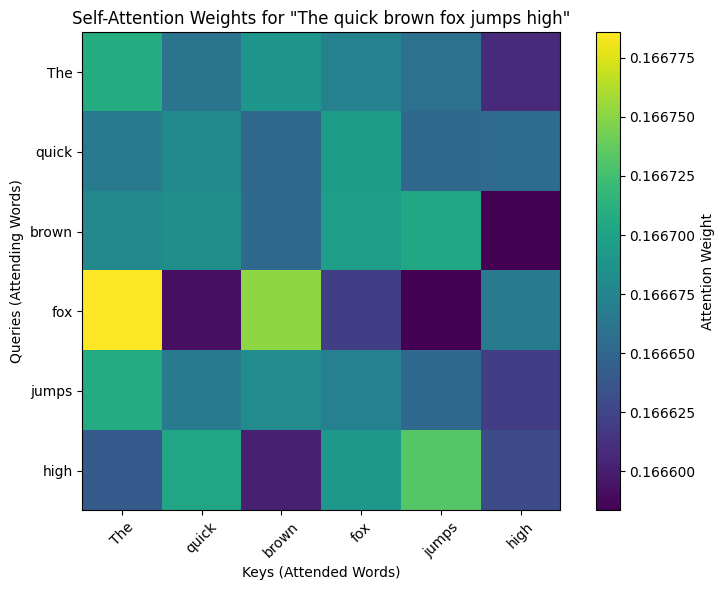

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Scaled Dot-Product Attention
def scaled_dot_product_attention(Q, K, V, d_k):
    """
    Compute scaled dot-product attention as in 'Attention is All You Need'.
    Args:
        Q: Queries (shape: [sequence_length, d_k])
        K: Keys (shape: [sequence_length, d_k])
        V: Values (shape: [sequence_length, d_v])
        d_k: Dimension of queries/keys
    Returns:
        output: Attention-weighted output (shape: [sequence_length, d_v])
        attention_weights: Softmax scores (shape: [sequence_length, sequence_length])
    """
    # Step 1: Compute dot products of queries and keys, scaled by sqrt(d_k)
    scores = np.matmul(Q, K.T) / np.sqrt(d_k)  # Shape: [seq_len, seq_len]

    # Step 2: Apply softmax to get attention weights
    exp_scores = np.exp(scores)
    attention_weights = exp_scores / np.sum(exp_scores, axis=-1, keepdims=True)

    # Step 3: Compute output as weighted sum of values
    output = np.matmul(attention_weights, V)  # Shape: [seq_len, d_v]

    return output, attention_weights

# Main function
def main():
    # Sequence: 6 words ("The quick brown fox jumps high")
    sequence_length = 6
    d_model = 6  # Embedding dimension
    d_k = d_model  # Query/key dimension
    d_v = d_model  # Value dimension

    # Standard embeddings (simplified GloVe-like, normalized for clarity)
    # Each word has a 6D vector, manually defined to reflect semantic similarity
    words = ["The", "quick", "brown", "fox", "jumps", "high"]
    X = np.array([
        [0.1, 0.0, 0.1, 0.0, 0.1, 0.0],  # "The" (determiner, neutral)
        [0.0, 0.2, 0.0, 0.1, 0.0, 0.1],  # "quick" (adjective, speed-related)
        [0.0, 0.1, 0.2, 0.0, 0.0, 0.1],  # "brown" (adjective, color-related)
        [0.1, 0.0, 0.0, 0.2, 0.1, 0.0],  # "fox" (noun, animal)
        [0.0, 0.1, 0.0, 0.1, 0.2, 0.0],  # "jumps" (verb, action)
        [0.0, 0.0, 0.1, 0.0, 0.1, 0.2]   # "high" (adjective, position)
    ], dtype=np.float32)

    # Linear projections to get queries, keys, values
    # Use random weights for realism (instead of identity matrices)
    np.random.seed(42)  # For reproducibility
    W_q = np.random.randn(d_model, d_k) * 0.1  # Query weight matrix
    W_k = np.random.randn(d_model, d_k) * 0.1  # Key weight matrix
    W_v = np.random.randn(d_model, d_v) * 0.1  # Value weight matrix

    Q = np.matmul(X, W_q)  # Queries: [seq_len, d_k]
    K = np.matmul(X, W_k)  # Keys: [seq_len, d_k]
    V = np.matmul(X, W_v)  # Values: [seq_len, d_v]

    # Compute attention
    output, attention_weights = scaled_dot_product_attention(Q, K, V, d_k)

    # Print results with explanations
    print("Input Embeddings (X):")
    print("Each row is a 6D embedding for a word in the sequence.")
    print(X)
    print("\nQueries (Q):")
    print("Transformed embeddings for computing attention scores.")
    print(Q)
    print("\nKeys (K):")
    print("Transformed embeddings for matching with queries.")
    print(K)
    print("\nValues (V):")
    print("Transformed embeddings to be weighted by attention scores.")
    print(V)
    print("\nAttention Weights (6x6 matrix):")
    print("Each row sums to 1, showing how each word attends to others.")
    print("Rows: Queries (words attending); Columns: Keys (words attended to).")
    print(attention_weights)
    print("\nAttention Output (6x6 matrix):")
    print("New representations for each word, incorporating context from others.")
    print(output)

    # Interpret attention weights
    print("\nInterpretation of Attention Weights:")
    for i, word in enumerate(words):
        max_idx = np.argmax(attention_weights[i])
        max_weight = attention_weights[i, max_idx]
        print(f"- '{word}' attends most to '{words[max_idx]}' (weight: {max_weight:.3f}).")
        if max_idx == i:
            print(f"  This suggests '{word}' focuses on itself, capturing its own features.")
        else:
            print(f"  This suggests '{word}' relies on '{words[max_idx]}' for context.")

    # Visualize attention weights as a heatmap
    plt.figure(figsize=(8, 6))
    plt.imshow(attention_weights, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Attention Weight')
    plt.xticks(np.arange(sequence_length), words, rotation=45)
    plt.yticks(np.arange(sequence_length), words)
    plt.xlabel('Keys (Attended Words)')
    plt.ylabel('Queries (Attending Words)')
    plt.title('Self-Attention Weights for "The quick brown fox jumps high"')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()